In [ ]:
import argparse
import time

# from godec import godec
import scipy.io as sio

from numpy import prod, zeros, sqrt
from numpy.random import randn
from scipy.linalg import qr
from sklearn.metrics import mean_squared_error

import numpy as np
from matplotlib import pyplot as plt

In [51]:
def godec(X):
    # t = time.time()
    rank=1
    card=None
    iterated_power=10
    max_iter=10000000
    tol=0.0000001

    iter = 1
    RMSE = []
    card = prod(X.shape) if card is None else card

    X = X.T if(X.shape[0] < X.shape[1]) else X
    m, n = X.shape

    L = X
    S = zeros(X.shape)
    LS = zeros(X.shape)

    while True:
        # Update of L
        Y2 = randn(n, rank)
        for i in range(iterated_power):
            Y1 = L.dot(Y2)
            Y2 = L.T.dot(Y1)
        Q, R = qr(Y2, mode='economic')
        L_new = (L.dot(Q)).dot(Q.T)

        # Update of S
        T = L - L_new + S
        L = L_new
        T_vec = T.reshape(-1)
        S_vec = S.reshape(-1)
        idx = abs(T_vec).argsort()[::-1]
        S_vec[idx[:card]] = T_vec[idx[:card]]
        S = S_vec.reshape(S.shape)

        # Reconstruction
        LS = L + S

        # Stopping criteria
        error = sqrt(mean_squared_error(X, LS))
        RMSE.append(error)

        print("iter: ", iter, "error: ", error)
        if (error <= tol) or (iter >= max_iter):
            break
        else:
            iter = iter + 1

    return L,S

In [52]:
# Load data
mat_z = sio.loadmat("E:\\MY\\paper\\FDILocation\\code\\data\\single\\Z_ori\\Z-10-cs.mat")
mat_za = sio.loadmat("E:\\MY\\paper\\FDILocation\\code\\data\\single\\Za\\Za-10-cs.mat")
z = mat_z['z'][:,:,0]
za = mat_za['za'][:,:,0]

A = zeros((1,26))
Z = zeros((1,26))
for i in range(1):
    N = np.vstack((z[0:-1,:],za[i,:]))
    M = N.T

    [m,n] = M.shape
    L,S = godec(M)

    A[i,:] = S.T[m-1,:]
    Z[i,:] = L.T[m-1,:]
    # sio.savemat(path+'\A_new\godec\S_new-10-cs.mat', {'S': L})
# mat_a = sio.loadmat("/Users/dqy/Desktop/data/A/a.mat")
# A = mat_a['a']
#mat = sio.loadmat("dataset/demo.mat")
#M, height, width = mat['M'], int(mat['m']), int(mat['n'])

iter:  1 error:  3.209675341400689e-17


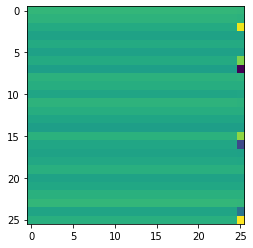

In [53]:
im = plt.imshow(M)

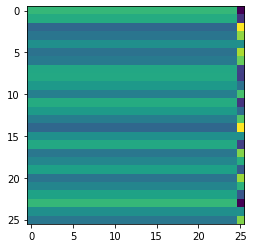

In [54]:
im3 = plt.imshow(S)

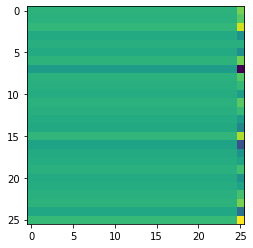

In [55]:
im3 = plt.imshow(L)

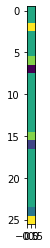

In [34]:
A_ori = sio.loadmat("E:\\MY\\paper\\FDILocation\\code\\data\\single\\A\\A-10-cs.mat")
a = A_ori['a'][:,:,0]
im3 = plt.imshow(a.T)